In [1]:
suppressMessages(library(ggplot2))
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(purrr))
suppressMessages(library(readr))
suppressMessages(library(patchwork))
suppressMessages(library(BSgenome.Hsapiens.UCSC.hg38))
suppressMessages(library(dplyr))
suppressMessages(library(cowplot))
suppressMessages(library(ggrepel))
suppressMessages(library(rhdf5))
suppressMessages(library(chromVARmotifs))
suppressMessages(library(tidyr))
suppressMessages(library(Ipaper))
suppressMessages(library(ComplexHeatmap))
library(colorRamp2)

In [2]:
set.seed(42)
addArchRThreads(threads = 64)

Setting default number of Parallel threads to 64.



In [3]:
proj <- loadArchRProject("./ArchRProject", showLogo = FALSE)
proj

Successfully loaded ArchRProject!


           ___      .______        ______  __    __  .______      
          /   \     |   _  \      /      ||  |  |  | |   _  \     
         /  ^  \    |  |_)  |    |  ,----'|  |__|  | |  |_)  |    
        /  /_\  \   |      /     |  |     |   __   | |      /     
       /  _____  \  |  |\  \\___ |  `----.|  |  |  | |  |\  \\___.
      /__/     \__\ | _| `._____| \______||__|  |__| | _| `._____|
    



class: ArchRProject 
outputDirectory: /home/hanxue/lab/scATAC/BCY_ATAC_R/joint/ArchRProject 
samples(11): 11T 12N ... 21T 22T
sampleColData names(1): ArrowFiles
cellColData names(29): Sample TSSEnrichment ... cptypePredictedCell
  cptypePredictedGroup
numberOfCells(1): 86017
medianTSS(1): 17.122
medianFrags(1): 13190

In [3]:
proj <- loadArchRProject("./ArchRProject_epithelial", showLogo = FALSE)

Successfully loaded ArchRProject!



In [4]:
seRNA <- readRDS("/home/hanxue/lab/scRNA/neoadjuvant/scRNA-epi.rds") 

In [5]:
seRNA

Loading required package: SingleCellExperiment



class: SingleCellExperiment 
dim: 39735 24058 
metadata(32): annotation_colors batch_colors ... tsne umap
assays(1): X
rownames(39735): TNFRSF4 TNFRSF18 ... CR381653.1 ITGB2-AS1
rowData names(17): n_cells_by_counts mean_counts ... end varm
colnames(24058): AAACCTGAGTACGCCC-1-10T AAACCTGCACATTTCT-1-10T ...
  TTTGTCAGTCATCCCT-1-22T TTTGTCATCAATCACG-1-22T
colData names(28): batch mt_frac ... cnv_status epi.type
reducedDimNames(7): X_cnv X_cnv_pca ... X_tsne X_umap
mainExpName: NULL
altExpNames(0):

In [6]:
proj <- addGeneIntegrationMatrix(
  ArchRProj      = proj,
  useMatrix      = "GeneScoreMatrix",     # 用基因分数与 scRNA 做锚定转移
  matrixName     = "GeneIntegrationMatrix",
  reducedDims    = "IterativeLSI",        # 与上面一致
  seRNA          = seRNA,                 # 你的 Seurat 对象
  groupRNA       = "epi.subtype",            # 你在 scRNA 的细胞类型/簇注释列名
  nameCell       = "epiPredictedCell",       # 输出到 ArchR 的细胞预测列名
  nameGroup      = "epiPredictedGroup",      # 输出到 ArchR 的分组预测列名
  transferParams = list(dims = 1:30, k.weight = 20),
  addToArrow     = TRUE,                  # 很关键！写入 Arrow，才能成为“AvailableMatrices”
  force          = TRUE                   # 如需覆盖同名矩阵
)


ArchR logging to : ArchRLogs/ArchR-addGeneIntegrationMatrix-1c287f3b7c0de8-Date-2025-09-10_Time-07-46-43.327308.log
If there is an issue, please report to github with logFile!

2025-09-10 07:46:43.370804 : Running Seurat's Integration Stuart* et al 2019, 0.001 mins elapsed.



2025-09-10 07:46:43.765829 : Checking ATAC Input, 0.007 mins elapsed.

2025-09-10 07:46:55.745425 : Checking RNA Input, 0.207 mins elapsed.

2025-09-10 07:47:12.719324 : Found 20182 overlapping gene names from gene scores and rna matrix!, 0.49 mins elapsed.

2025-09-10 07:47:12.723363 : Creating Integration Blocks, 0.49 mins elapsed.

2025-09-10 07:47:13.269294 : Prepping Interation Data, 0.499 mins elapsed.

subThreading Disabled since ArchRLocking is TRUE see `addArchRLocking`

Filtering 1 dims correlated > 0.75 to log10(depth + 1)

2025-09-10 07:47:14.485109 : Computing Integration in 3 Integration Blocks!, 0 mins elapsed.

2025-09-10 07:47:14.488736 : Block (1 of 3) : Computing Integration, 0 mins elapsed.

2025-09-10 07:47:17.767954 : Block (1 of 3) : Identifying Variable Genes, 0.055 mins elapsed.

2025-09-10 07:47:23.304765 : Block (1 of 3) : Getting GeneScoreMatrix, 0.147 mins elapsed.

2025-09-10 07:49:08.183175 : Block (1 of 3) : Imputing GeneScoreMatrix, 1.895 mins elapsed.


In [7]:
proj <- addPeak2GeneLinks(
    ArchRProj = proj,
    reducedDims = "IterativeLSI"
)

ArchR logging to : ArchRLogs/ArchR-addPeak2GeneLinks-1c287f6e622005-Date-2025-09-10_Time-08-20-39.598889.log
If there is an issue, please report to github with logFile!

2025-09-10 08:20:39.855852 : Getting Available Matrices, 0.004 mins elapsed.

2025-09-10 08:20:42.618122 : Filtered Low Prediction Score Cells (261 of 29719, 0.009), 0.023 mins elapsed.

Filtering 1 dims correlated > 0.75 to log10(depth + 1)

2025-09-10 08:20:44.118928 : Computing KNN, 0.048 mins elapsed.

2025-09-10 08:20:44.305429 : Identifying Non-Overlapping KNN pairs, 0.051 mins elapsed.

2025-09-10 08:20:46.331333 : Identified 494 Groupings!, 0.084 mins elapsed.

2025-09-10 08:20:46.383783 : Getting Group RNA Matrix, 0.085 mins elapsed.

2025-09-10 08:21:06.829966 : Getting Group ATAC Matrix, 0.426 mins elapsed.

2025-09-10 08:21:57.771876 : Normalizing Group Matrices, 1.275 mins elapsed.

2025-09-10 08:22:08.698179 : Finding Peak Gene Pairings, 1.457 mins elapsed.

2025-09-10 08:22:09.609694 : Computing Correlat

In [8]:
p2g <- getPeak2GeneLinks(
    ArchRProj = proj,
    corCutOff = 0.45,
    resolution = 1,
    returnLoops = FALSE
)

In [9]:
p2g$geneName <- mcols(metadata(p2g)$geneSet)$name[p2g$idxRNA]
p2g$peakName <- (metadata(p2g)$peakSet %>% {paste0(seqnames(.), "_", start(.), "_", end(.))})[p2g$idxATAC]
p2g

DataFrame with 84687 rows and 8 columns
        idxATAC    idxRNA Correlation         FDR  VarQATAC   VarQRNA
      <integer> <integer>   <numeric>   <numeric> <numeric> <numeric>
1            98         5    0.538425 6.55410e-37  0.830995  0.362551
2           102         5    0.538397 6.62251e-37  0.449031  0.362551
3           136         5    0.586381 3.19308e-45  0.749561  0.362551
4           141         5    0.488754 1.28113e-29  0.745168  0.362551
5           145         5    0.548918 1.29523e-38  0.756674  0.362551
...         ...       ...         ...         ...       ...       ...
84683    345174     20162    0.461981 3.64918e-26  0.360320  0.987117
84684    345175     20162    0.610786 5.12070e-50  0.489992  0.987117
84685    345178     20162    0.512125 6.74728e-33  0.908752  0.987117
84686    345182     20162    0.557424 4.85185e-40  0.732145  0.987117
84687    345178     20166    0.492006 4.63853e-30  0.908752  0.651670
         geneName               peakName
      <ch

In [10]:
metadata(p2g)$seATAC
## [1] "/workspace/ArchR/ArchR_Website_Testing/bookdown/Save-ProjHeme4/Peak2GeneLinks/seATAC-Group-KNN.rds"
metadata(p2g)$seRNA
## [1] "/workspace/ArchR/ArchR_Website_Testing/bookdown/Save-ProjHeme4/Peak2GeneLinks/seRNA-Group-KNN.rds"

[1] "/home/hanxue/lab/scATAC/BCY_ATAC_R/joint/ArchRProject_epithelial/Peak2GeneLinks/seATAC-Group-KNN.rds"

[1] "/home/hanxue/lab/scATAC/BCY_ATAC_R/joint/ArchRProject_epithelial/Peak2GeneLinks/seRNA-Group-KNN.rds"

In [11]:
p2g <- getPeak2GeneLinks(
    ArchRProj = proj,
    corCutOff = 0.45,
    resolution = 1,
    returnLoops = TRUE
)

p2g[[1]]

GRanges object with 84671 ranges and 2 metadata columns:
          seqnames              ranges strand |     value         FDR
             <Rle>           <IRanges>  <Rle> | <numeric>   <numeric>
      [1]     chr1       913869-924880      * |  0.470717 2.94563e-27
      [2]     chr1       913869-959309      * |  0.465760 1.23988e-26
      [3]     chr1      919692-1014490      * |  0.538425 6.55410e-37
      [4]     chr1      919692-1018171      * |  0.538397 6.62251e-37
      [5]     chr1      919692-1062183      * |  0.586381 3.19308e-45
      ...      ...                 ...    ... .       ...         ...
  [84667]     chrX 154460091-154479257      * |  0.461981 3.64918e-26
  [84668]     chrX 154463283-154479257      * |  0.610786 5.12070e-50
  [84669]     chrX 154473961-154479257      * |  0.512125 6.74728e-33
  [84670]     chrX 154473961-154547572      * |  0.492006 4.63853e-30
  [84671]     chrX 154479257-154479537      * |  0.557424 4.85185e-40
  -------
  seqinfo: 23 sequences

In [12]:
p2g <- getPeak2GeneLinks(
    ArchRProj = proj,
    corCutOff = 0.45,
    resolution = 1000,
    returnLoops = TRUE
)

p2g[[1]]

GRanges object with 78008 ranges and 2 metadata columns:
          seqnames              ranges strand |     value         FDR
             <Rle>           <IRanges>  <Rle> | <numeric>   <numeric>
      [1]     chr1       913500-924500      * |  0.470717 2.94563e-27
      [2]     chr1       913500-959500      * |  0.465760 1.23988e-26
      [3]     chr1      919500-1014500      * |  0.538425 6.55410e-37
      [4]     chr1      919500-1018500      * |  0.538397 6.62251e-37
      [5]     chr1      919500-1062500      * |  0.586381 3.19308e-45
      ...      ...                 ...    ... .       ...         ...
  [78004]     chrX 154460500-154479500      * |  0.461981 3.64918e-26
  [78005]     chrX 154463500-154479500      * |  0.610786 5.12070e-50
  [78006]     chrX 154473500-154479500      * |  0.512125 6.74728e-33
  [78007]     chrX 154473500-154547500      * |  0.492006 4.63853e-30
  [78008]     chrX           154479500      * |  0.557424 4.85185e-40
  -------
  seqinfo: 23 sequences

In [13]:
p2g <- getPeak2GeneLinks(
    ArchRProj = proj,
    corCutOff = 0.45,
    resolution = 10000,
    returnLoops = TRUE
)

p2g[[1]]

GRanges object with 53239 ranges and 2 metadata columns:
          seqnames              ranges strand |     value         FDR
             <Rle>           <IRanges>  <Rle> | <numeric>   <numeric>
      [1]     chr1       915000-925000      * |  0.470717 2.94563e-27
      [2]     chr1       915000-955000      * |  0.465760 1.23988e-26
      [3]     chr1      915000-1015000      * |  0.538425 6.55410e-37
      [4]     chr1      915000-1065000      * |  0.586381 3.19308e-45
      [5]     chr1      915000-1075000      * |  0.548918 1.29523e-38
      ...      ...                 ...    ... .       ...         ...
  [53235]     chrX 154445000-154475000      * |  0.529352 1.74136e-35
  [53236]     chrX 154455000-154465000      * |  0.677629 1.38549e-65
  [53237]     chrX 154465000-154475000      * |  0.610786 5.12070e-50
  [53238]     chrX           154475000      * |  0.557424 4.85185e-40
  [53239]     chrX 154475000-154545000      * |  0.492006 4.63853e-30
  -------
  seqinfo: 23 sequences

In [12]:
after_cells <- getCellNames(ArchRProj = proj)[proj$neoadjuvant=="after_neoadjuvant"]
proj_after <- proj[after_cells,]

Dropping ImputeWeights Since You Are Subsetting Cells! ImputeWeights is a cell-x-cell Matrix!



In [13]:
before_cells <- getCellNames(ArchRProj = proj)[proj$neoadjuvant=="before_neoadjuvant"]
proj_before <- proj[before_cells,]

Dropping ImputeWeights Since You Are Subsetting Cells! ImputeWeights is a cell-x-cell Matrix!



In [16]:
proj$neoadjuvant <- ifelse(
  proj$neoadjuvant == "after_neoadjuvant", 
  "Post-NAT", 
  "Non-NAT"
)

In [22]:
markerGenes  <- c(
    "VEGFB", "TNFRSF1B",  "CXCL16"
  )

p <- plotBrowserTrack(
    ArchRProj = proj, 
    groupBy = "neoadjuvant", 
    geneSymbol = markerGenes, 
    upstream = 50000,
    downstream = 50000,
    loops = getPeak2GeneLinks(proj)
)

ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-2788241a58c3d4-Date-2025-09-08_Time-14-51-02.599818.log
If there is an issue, please report to github with logFile!

2025-09-08 14:51:02.685449 : Validating Region, 0.001 mins elapsed.



GRanges object with 3 ranges and 2 metadata columns:
      seqnames            ranges strand |     gene_id      symbol
         <Rle>         <IRanges>  <Rle> | <character> <character>
  [1]    chr11 64234538-64238793      + |        7423       VEGFB
  [2]     chr1 12167003-12209228      + |        7133    TNFRSF1B
  [3]    chr17   4733526-4739922      - |       58191      CXCL16
  -------
  seqinfo: 24 sequences from hg38 genome


2025-09-08 14:51:02.742754 : Adding Bulk Tracks (1 of 3), 0.002 mins elapsed.

2025-09-08 14:51:04.775586 : Adding Feature Tracks (1 of 3), 0.036 mins elapsed.

2025-09-08 14:51:04.854978 : Adding Loop Tracks (1 of 3), 0.038 mins elapsed.

2025-09-08 14:51:05.231578 : Adding Gene Tracks (1 of 3), 0.044 mins elapsed.

2025-09-08 14:51:05.527146 : Plotting, 0.049 mins elapsed.

2025-09-08 14:51:06.205356 : Adding Bulk Tracks (2 of 3), 0.06 mins elapsed.

2025-09-08 14:51:08.607953 : Adding Feature Tracks (2 of 3), 0.1 mins elapsed.

2025-09-08 14:51:08.678693 : Adding Loop Tracks (2 of 3), 0.101 mins elapsed.

2025-09-08 14:51:09.118939 : Adding Gene Tracks (2 of 3), 0.109 mins elapsed.

2025-09-08 14:51:09.441018 : Plotting, 0.114 mins elapsed.

2025-09-08 14:51:10.095173 : Adding Bulk Tracks (3 of 3), 0.125 mins elapsed.

2025-09-08 14:51:12.031058 : Adding Feature Tracks (3 of 3), 0.157 mins elapsed.

2025-09-08 14:51:12.102684 : Adding Loop Tracks (3 of 3), 0.158 mins elapsed.

2025-

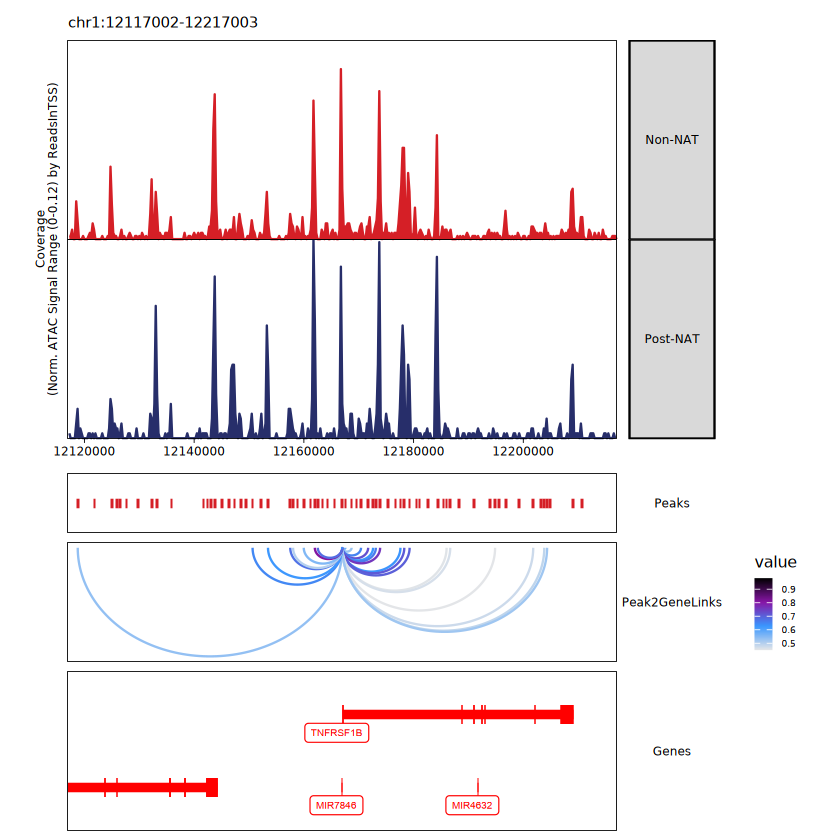

In [24]:
grid::grid.newpage()
grid::grid.draw(p$TNFRSF1B)

In [25]:
plotPDF(plotList = p, 
    name = "Plot-Tracks-Marker-Genes-with-Peak2GeneLinks.pdf", 
    ArchRProj = proj, 
    addDOC = FALSE, width = 5, height = 5)

Plotting Gtable!



NULL


Plotting Gtable!



NULL


Plotting Gtable!



NULL


In [4]:
p <- plotPeak2GeneHeatmap(ArchRProj = proj, groupBy = "cptype")

ArchR logging to : ArchRLogs/ArchR-plotPeak2GeneHeatmap-7e9f7bc61706-Date-2025-09-23_Time-02-55-47.344052.log
If there is an issue, please report to github with logFile!



ERROR: Error in value[[3L]](cond): select Not Found in Colnames of cellColData:
[1m[33mError[39m in `dplyr::mutate()`:[22m
[1m[22m[36mℹ[39m In argument: `tmpNewCol123 = eval(parse(text = select[x]))`.
[1mCaused by error:[22m
[33m![39m object 'cptype' not found



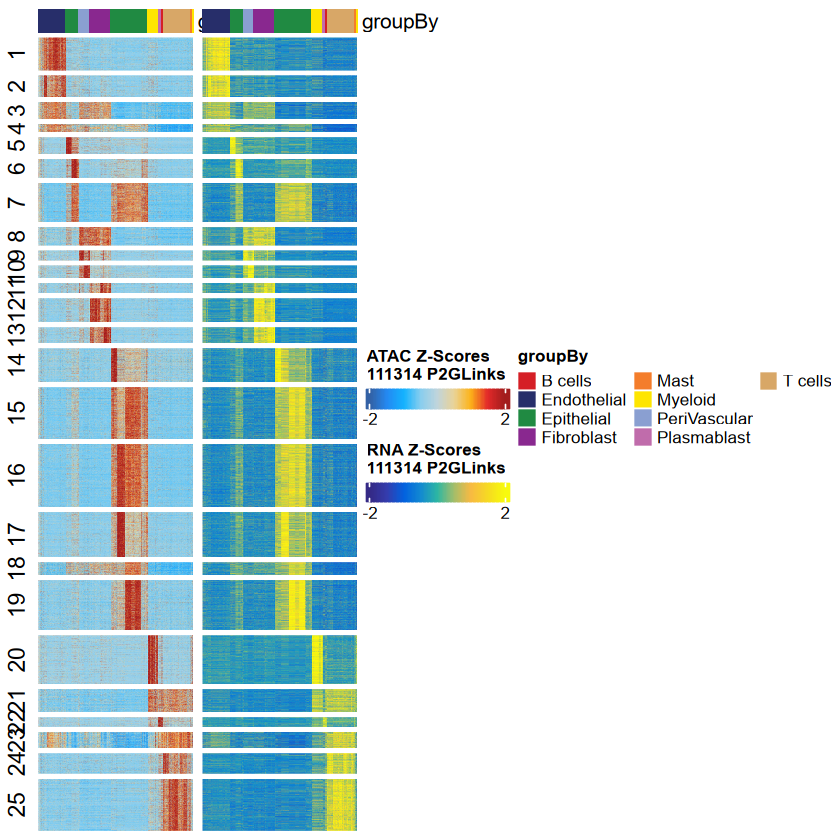

In [ ]:
p

In [ ]:
plotPDF( p, 
    name = "Plot-Tracks-Marker-Genes-with-Peak2GeneLinks.pdf", 
    ArchRProj = proj, 
    addDOC = FALSE, width = 5, height = 10)


Plotting ComplexHeatmap!



#### 染色质共开放

In [4]:
proj <- addCoAccessibility(
    ArchRProj = proj,
    reducedDims = "IterativeLSI"
)

ArchR logging to : ArchRLogs/ArchR-addCoAccessibility-27882465bb1d7e-Date-2025-09-08_Time-13-21-47.188932.log
If there is an issue, please report to github with logFile!

Filtering 1 dims correlated > 0.75 to log10(depth + 1)

2025-09-08 13:21:48.296617 : Computing KNN, 0.018 mins elapsed.

2025-09-08 13:21:48.851113 : Identifying Non-Overlapping KNN pairs, 0.028 mins elapsed.

2025-09-08 13:21:50.898404 : Identified 500 Groupings!, 0.062 mins elapsed.

2025-09-08 13:22:03.533475 : Computing Co-Accessibility chr1 (1 of 23), 0.272 mins elapsed.

2025-09-08 13:22:35.884283 : Computing Co-Accessibility chr2 (2 of 23), 0.812 mins elapsed.

2025-09-08 13:22:57.93353 : Computing Co-Accessibility chr3 (3 of 23), 1.179 mins elapsed.

2025-09-08 13:23:15.818154 : Computing Co-Accessibility chr4 (4 of 23), 1.477 mins elapsed.

2025-09-08 13:23:29.313432 : Computing Co-Accessibility chr5 (5 of 23), 1.702 mins elapsed.

2025-09-08 13:23:43.713194 : Computing Co-Accessibility chr6 (6 of 23), 1.942 

In [6]:
cA <- getCoAccessibility(
    ArchRProj = proj,
    corCutOff = 0.5,
    resolution = 10000,
    returnLoops = TRUE
)

In [7]:
cA[[1]]

GRanges object with 222328 ranges and 9 metadata columns:
           seqnames              ranges strand | correlation Variability1
              <Rle>           <IRanges>  <Rle> |   <numeric>    <numeric>
       [1]     chr1       805000-845000      * |    0.567132  0.000315339
       [2]     chr1       815000-905000      * |    0.624129  0.003945895
       [3]     chr1       835000-915000      * |    0.650681  0.001311065
       [4]     chr1       835000-925000      * |    0.562906  0.001311065
       [5]     chr1       845000-915000      * |    0.613750  0.001646024
       ...      ...                 ...    ... .         ...          ...
  [222324]     chrX 155185000-155265000      * |    0.646510  0.001192973
  [222325]     chrX 155235000-155255000      * |    0.654596  0.000389119
  [222326]     chrX           155265000      * |    0.528549  0.000276181
  [222327]     chrX           155335000      * |    0.658065  0.000698206
  [222328]     chrX           155395000      * |    0.

In [14]:
## 保存结果
saveArchRProject(proj, load = FALSE)

Saving ArchRProject...

